# Customer Churn Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from xgboost import XGBClassifier
from sklearn import tree
from collections import Counter
import graphviz

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve
from sklearn import metrics

# A) Dataset Information

In [3]:
# Reading All Datasets
df1 = pd.read_csv('Telco_customer_churn.csv')
df2 = pd.read_csv('Telco_customer_churn_demographics.csv')
df3 = pd.read_csv('Telco_customer_churn_location.csv')
df4 = pd.read_csv('Telco_customer_churn_population.csv')
df5 = pd.read_csv('Telco_customer_churn_services.csv')
df6 = pd.read_csv('Telco_customer_churn_status.csv')

In [4]:
# Matching Column Name with the other datasets
df1['Customer ID'] = df1['CustomerID']
df1.drop('CustomerID',axis=1,inplace=True)
df1.head()

,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,...,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,Customer ID
0,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,...,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer,3668-QPYBK
1,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,...,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved,9237-HQITU
2,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,...,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved,9305-CDSKC
3,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,...,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved,7892-POOKP
4,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,...,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices,0280-XJGEX


In [5]:
# Sorting according to Customer ID
df1.set_index('Customer ID',inplace=True)
df1.sort_values('Customer ID',inplace=True)
df1.head()

,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
Customer ID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,1,United States,California,Frazier Park,93225,"34.827662, -118.999073",34.827662,-118.999073,Female,No,...,One year,Yes,Mailed check,65.6,593.3,No,0,65,2205,NaN
0003-MKNFE,1,United States,California,Glendale,91206,"34.162515, -118.203869",34.162515,-118.203869,Male,No,...,Month-to-month,No,Mailed check,59.9,542.4,No,0,66,5414,NaN
0004-TLHLJ,1,United States,California,Costa Mesa,92627,"33.645672, -117.922613",33.645672,-117.922613,Male,No,...,Month-to-month,Yes,Electronic check,73.9,280.85,Yes,1,71,4479,Price too high
0011-IGKFF,1,United States,California,Martinez,94553,"38.014457, -122.115432",38.014457,-122.115432,Male,Yes,...,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes,1,99,3714,Product dissatisfaction
0013-EXCHZ,1,United States,California,Camarillo,93010,"34.227846, -119.079903",34.227846,-119.079903,Female,Yes,...,Month-to-month,Yes,Mailed check,83.9,267.4,Yes,1,68,3464,Network reliability


In [6]:
# Dataset Info
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Count              7043 non-null   int64  
 1   Country            7043 non-null   object 
 2   State              7043 non-null   object 
 3   City               7043 non-null   object 
 4   Zip Code           7043 non-null   int64  
 5   Lat Long           7043 non-null   object 
 6   Latitude           7043 non-null   float64
 7   Longitude          7043 non-null   float64
 8   Gender             7043 non-null   object 
 9   Senior Citizen     7043 non-null   object 
 10  Partner            7043 non-null   object 
 11  Dependents         7043 non-null   object 
 12  Tenure Months      7043 non-null   int64  
 13  Phone Service      7043 non-null   object 
 14  Multiple Lines     7043 non-null   object 
 15  Internet Service   7043 non-null   object 
 16  Online Securit

In [7]:
# Checking for Nan 
df1.isna().sum()

Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [8]:
# Setting Dataset Index
df2.set_index('Customer ID',inplace=True)
df2.sort_values('Customer ID',inplace=True)
df2.head()

,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
Customer ID,,,,,,,,
0002-ORFBO,1,Female,37,No,No,Yes,No,0
0003-MKNFE,1,Male,46,No,No,No,No,0
0004-TLHLJ,1,Male,50,No,No,No,No,0
0011-IGKFF,1,Male,78,No,Yes,Yes,No,0
0013-EXCHZ,1,Female,75,No,Yes,Yes,No,0


In [9]:
# Dropping Repeated Data
df2.drop(['Count','Gender','Senior Citizen','Dependents'],axis=1,inplace=True)
df2.head()

,Age,Under 30,Married,Number of Dependents
Customer ID,,,,
0002-ORFBO,37,No,Yes,0
0003-MKNFE,46,No,No,0
0004-TLHLJ,50,No,No,0
0011-IGKFF,78,No,Yes,0
0013-EXCHZ,75,No,Yes,0


In [10]:
# Checking for Nan 
df2.isna().sum()

Age                     0
Under 30                0
Married                 0
Number of Dependents    0
dtype: int64

In [11]:
# Setting Dataset Index
df3.set_index('Customer ID',inplace=True)
df3.sort_values('Customer ID',inplace=True)
df3.head()

# All Dataset Columns are already present in df1 

,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude
Customer ID,,,,,,,,
0002-ORFBO,1,United States,California,Frazier Park,93225,"34.827662, -118.999073",34.827662,-118.999073
0003-MKNFE,1,United States,California,Glendale,91206,"34.162515, -118.203869",34.162515,-118.203869
0004-TLHLJ,1,United States,California,Costa Mesa,92627,"33.645672, -117.922613",33.645672,-117.922613
0011-IGKFF,1,United States,California,Martinez,94553,"38.014457, -122.115432",38.014457,-122.115432
0013-EXCHZ,1,United States,California,Camarillo,93010,"34.227846, -119.079903",34.227846,-119.079903


In [12]:
# Diplaying Dataset
df4.head()

,ID,Zip Code,Population
0,1,90001,"54,492"
1,2,90002,"44,586"
2,3,90003,"58,198"
3,4,90004,"67,852"
4,5,90005,"43,019"


In [13]:
# Dataset Info
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          1671 non-null   int64 
 1   Zip Code    1671 non-null   int64 
 2   Population  1671 non-null   object
dtypes: int64(2), object(1)
memory usage: 39.3+ KB


In [14]:
# Setting Dataset Index
df5.set_index('Customer ID',inplace=True)
df5.sort_values('Customer ID',inplace=True)
df5.head()

,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
Customer ID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,1,Q3,Yes,2,9,None,Yes,42.39,No,Yes,...,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81
0003-MKNFE,1,Q3,No,0,9,None,Yes,10.69,Yes,Yes,...,No,Month-to-Month,No,Credit Card,59.9,542.40,38.33,10,96.21,610.28
0004-TLHLJ,1,Q3,No,0,4,Offer E,Yes,33.65,No,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45
0011-IGKFF,1,Q3,Yes,1,13,Offer D,Yes,27.82,No,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51
0013-EXCHZ,1,Q3,Yes,3,3,None,Yes,7.38,No,Yes,...,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54


In [15]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Count                              7043 non-null   int64  
 1   Quarter                            7043 non-null   object 
 2   Referred a Friend                  7043 non-null   object 
 3   Number of Referrals                7043 non-null   int64  
 4   Tenure in Months                   7043 non-null   int64  
 5   Offer                              7043 non-null   object 
 6   Phone Service                      7043 non-null   object 
 7   Avg Monthly Long Distance Charges  7043 non-null   float64
 8   Multiple Lines                     7043 non-null   object 
 9   Internet Service                   7043 non-null   object 
 10  Internet Type                      7043 non-null   object 
 11  Avg Monthly GB Download            7043 non-nu

In [16]:
df5.drop(['Count','Phone Service','Multiple Lines','Internet Service','Online Security','Online Backup','Streaming TV',
          'Streaming Movies','Contract','Paperless Billing','Payment Method',
          'Monthly Charge','Total Charges'],axis=1,inplace=True)
df5.head()

,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Internet Type,Avg Monthly GB Download,Device Protection Plan,Premium Tech Support,Streaming Music,Unlimited Data,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
Customer ID,,,,,,,,,,,,,,,,
0002-ORFBO,Q3,Yes,2,9,None,42.39,Cable,16,No,Yes,No,Yes,0.00,0,381.51,974.81
0003-MKNFE,Q3,No,0,9,None,10.69,Cable,10,No,No,Yes,No,38.33,10,96.21,610.28
0004-TLHLJ,Q3,No,0,4,Offer E,33.65,Fiber Optic,30,Yes,No,No,Yes,0.00,0,134.60,415.45
0011-IGKFF,Q3,Yes,1,13,Offer D,27.82,Fiber Optic,4,Yes,No,No,Yes,0.00,0,361.66,1599.51
0013-EXCHZ,Q3,Yes,3,3,None,7.38,Fiber Optic,11,No,Yes,No,Yes,0.00,0,22.14,289.54


In [17]:
# Checking for Nan 
df5.isna().sum()

Quarter                              0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Avg Monthly Long Distance Charges    0
Internet Type                        0
Avg Monthly GB Download              0
Device Protection Plan               0
Premium Tech Support                 0
Streaming Music                      0
Unlimited Data                       0
Total Refunds                        0
Total Extra Data Charges             0
Total Long Distance Charges          0
Total Revenue                        0
dtype: int64

In [18]:
# Setting Dataset Index
df6.set_index('Customer ID',inplace=True)
df6.sort_values('Customer ID',inplace=True)
df6.head()

,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
Customer ID,,,,,,,,,,
0002-ORFBO,1,Q3,3,Stayed,No,0,65,2205,NaN,NaN
0003-MKNFE,1,Q3,5,Stayed,No,0,66,5414,NaN,NaN
0004-TLHLJ,1,Q3,1,Churned,Yes,1,71,4479,Competitor,Competitor had better devices
0011-IGKFF,1,Q3,1,Churned,Yes,1,91,3714,Dissatisfaction,Product dissatisfaction
0013-EXCHZ,1,Q3,1,Churned,Yes,1,68,3464,Dissatisfaction,Network reliability


In [19]:
#Dropping Repeated Data
df6.drop(['Count','Quarter','Churn Value','CLTV','Churn Score','Churn Label','Churn Reason'],axis=1,inplace=True)
df6.head()

,Satisfaction Score,Customer Status,Churn Category
Customer ID,,,
0002-ORFBO,3,Stayed,NaN
0003-MKNFE,5,Stayed,NaN
0004-TLHLJ,1,Churned,Competitor
0011-IGKFF,1,Churned,Dissatisfaction
0013-EXCHZ,1,Churned,Dissatisfaction


In [20]:
# Checking for Nan 
df6.isna().sum()

Satisfaction Score       0
Customer Status          0
Churn Category        5174
dtype: int64

In [21]:
df = [df1, df2, df5, df6]
df = pd.concat(df,axis=1)
df.head()

,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,...,Premium Tech Support,Streaming Music,Unlimited Data,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Category
Customer ID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,1,United States,California,Frazier Park,93225,"34.827662, -118.999073",34.827662,-118.999073,Female,No,...,Yes,No,Yes,0.00,0,381.51,974.81,3,Stayed,NaN
0003-MKNFE,1,United States,California,Glendale,91206,"34.162515, -118.203869",34.162515,-118.203869,Male,No,...,No,Yes,No,38.33,10,96.21,610.28,5,Stayed,NaN
0004-TLHLJ,1,United States,California,Costa Mesa,92627,"33.645672, -117.922613",33.645672,-117.922613,Male,No,...,No,No,Yes,0.00,0,134.60,415.45,1,Churned,Competitor
0011-IGKFF,1,United States,California,Martinez,94553,"38.014457, -122.115432",38.014457,-122.115432,Male,Yes,...,No,No,Yes,0.00,0,361.66,1599.51,1,Churned,Dissatisfaction
0013-EXCHZ,1,United States,California,Camarillo,93010,"34.227846, -119.079903",34.227846,-119.079903,Female,Yes,...,Yes,No,Yes,0.00,0,22.14,289.54,1,Churned,Dissatisfaction


In [22]:
df['Population'] = list('0'*len(df['Zip Code']))

In [23]:
for j in range(len(df4['Zip Code'])):
  for i in range(len(df['Zip Code'])):
    if df['Zip Code'][i] == df4['Zip Code'][j]:
      df['Population'][i]=df4['Population'][j]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [24]:
df = df.reindex(sorted(df.columns), axis=1)
df.head()

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,CLTV,Churn Category,Churn Label,Churn Reason,Churn Score,Churn Value,City,...,Tenure Months,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Zip Code
Customer ID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,37,16,42.39,2205,NaN,No,NaN,65,0,Frazier Park,...,9,9,593.3,0,381.51,0.00,974.81,No,Yes,93225
0003-MKNFE,46,10,10.69,5414,NaN,No,NaN,66,0,Glendale,...,9,9,542.4,10,96.21,38.33,610.28,No,No,91206
0004-TLHLJ,50,30,33.65,4479,Competitor,Yes,Price too high,71,1,Costa Mesa,...,4,4,280.85,0,134.60,0.00,415.45,No,Yes,92627
0011-IGKFF,78,4,27.82,3714,Dissatisfaction,Yes,Product dissatisfaction,99,1,Martinez,...,13,13,1237.85,0,361.66,0.00,1599.51,No,Yes,94553
0013-EXCHZ,75,11,7.38,3464,Dissatisfaction,Yes,Network reliability,68,1,Camarillo,...,3,3,267.4,0,22.14,0.00,289.54,No,Yes,93010


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 56 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                7043 non-null   int64  
 1   Avg Monthly GB Download            7043 non-null   int64  
 2   Avg Monthly Long Distance Charges  7043 non-null   float64
 3   CLTV                               7043 non-null   int64  
 4   Churn Category                     1869 non-null   object 
 5   Churn Label                        7043 non-null   object 
 6   Churn Reason                       1869 non-null   object 
 7   Churn Score                        7043 non-null   int64  
 8   Churn Value                        7043 non-null   int64  
 9   City                               7043 non-null   object 
 10  Contract                           7043 non-null   object 
 11  Count                              7043 non-nu

In [26]:
df.isna().sum()

Age                                     0
Avg Monthly GB Download                 0
Avg Monthly Long Distance Charges       0
CLTV                                    0
Churn Category                       5174
Churn Label                             0
Churn Reason                         5174
Churn Score                             0
Churn Value                             0
City                                    0
Contract                                0
Count                                   0
Country                                 0
Customer Status                         0
Dependents                              0
Device Protection                       0
Device Protection Plan                  0
Gender                                  0
Internet Service                        0
Internet Type                           0
Lat Long                                0
Latitude                                0
Longitude                               0
Married                           

In [27]:
# Replacing NaN Data according to Churn Label
for i in range(len(df['Churn Reason'])):
  if pd.isna(df['Churn Reason'][i]):
    if df['Churn Label'][i]=="No":
      df['Churn Reason'][i] = "Stayed"
      df['Churn Category'][i] = "Stayed"
    else:
      df['Churn Reason'][i] = "Not Provided"
      df['Churn Category'][i] = "Not Provided"

df.isna().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Age                                  0
Avg Monthly GB Download              0
Avg Monthly Long Distance Charges    0
CLTV                                 0
Churn Category                       0
Churn Label                          0
Churn Reason                         0
Churn Score                          0
Churn Value                          0
City                                 0
Contract                             0
Count                                0
Country                              0
Customer Status                      0
Dependents                           0
Device Protection                    0
Device Protection Plan               0
Gender                               0
Internet Service                     0
Internet Type                        0
Lat Long                             0
Latitude                             0
Longitude                            0
Married                              0
Monthly Charges                      0
Multiple Lines           

In [28]:
print(type(df['Churn Label'][0]))
print(df['Churn Label'][3])

<class 'str'>
Yes


In [29]:
df.duplicated().sum()

0

In [30]:
df['Churn Value'].value_counts()

0    5174
1    1869
Name: Churn Value, dtype: int64

In [31]:
df.shape

(7043, 56)

## Comments

*The dataset consisits of 56 columns and 7043 rows.

*There were  NaN objects in dataset (Replaced).

*There were no duplcated items.

*Df3 was ignored because it had the same columns as df1.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

# B) Data Visualization

[Text(0.5, 1.0, 'Outliers: Total Revenues')]

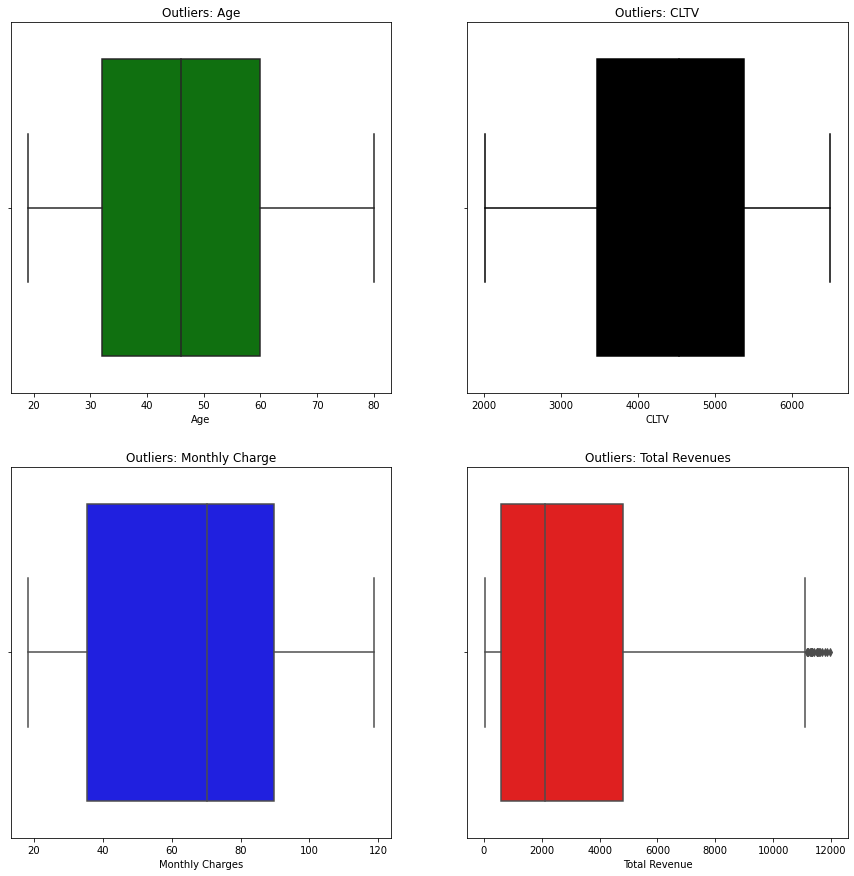

In [32]:
# detecting the outliers
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(15,15)

sns.boxplot(x='Age', data=df, color='green',ax=axes[0,0]).set(title='Outliers: Age')
sns.boxplot(x='CLTV', data=df, color='black',ax=axes[0,1]).set(title='Outliers: CLTV')
sns.boxplot(x='Monthly Charges', data=df, color='blue',ax=axes[1,0]).set(title='Outliers: Monthly Charge')
sns.boxplot(x='Total Revenue', data=df, color='red',ax=axes[1,1]).set(title='Outliers: Total Revenues')

# Outliers in total revenues

In [33]:
# High Revenue Income
df[df['Total Revenue']>11000]

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,CLTV,Churn Category,Churn Label,Churn Reason,Churn Score,Churn Value,City,...,Tenure Months,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Zip Code
Customer ID,,,,,,,,,,,,,,,,,,,,,
0164-APGRB,56,5,48.37,4589,Stayed,No,Stayed,69,0,Calistoga,...,72,72,8496.7,0,3482.64,0.00,11979.34,No,Yes,94515
0536-ACXIP,34,2,44.20,6452,Stayed,No,Stayed,53,0,Lodi,...,72,72,8165.1,0,3182.40,0.00,11347.50,No,Yes,95242
0619-OLYUR,32,27,47.83,6437,Stayed,No,Stayed,80,0,Garden Grove,...,72,72,8071.05,0,3443.76,0.00,11514.81,No,Yes,92840
0907-HQNTS,74,14,46.20,4588,Stayed,No,Stayed,47,0,Pittsburg,...,70,70,7987.6,0,3234.00,0.00,11221.60,No,Yes,94565
2380-DAMQP,63,25,40.59,4761,Stayed,No,Stayed,67,0,La Palma,...,72,72,8349.7,0,2922.48,0.00,11272.18,No,Yes,90623
2469-DTSGX,72,14,44.81,5388,Stayed,No,Stayed,75,0,Somis,...,72,72,7943.45,0,3226.32,0.00,11169.77,No,Yes,93066
2834-JRTUA,30,53,49.42,5200,Competitor,Yes,Competitor had better devices,81,1,Martinez,...,71,71,7532.15,0,3508.82,0.00,11040.97,No,Yes,94553
2889-FPWRM,31,8,34.87,4432,Competitor,Yes,Competitor offered higher download speeds,100,1,Mckinleyville,...,72,72,8684.8,0,2510.64,0.00,11195.44,No,Yes,95519
3259-FDWOY,60,12,47.34,4072,Competitor,Yes,Competitor offered higher download speeds,81,1,Elk Grove,...,71,71,7723.7,0,3361.14,0.00,11084.84,No,Yes,95758


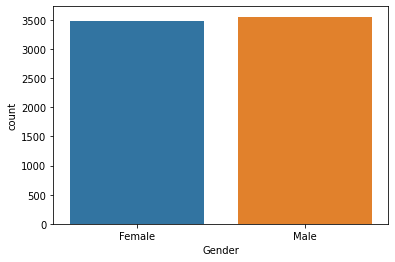

In [34]:
# Differentiating between customers according to gender
sns.countplot(x='Gender',data=df)

# Equal Ratio between males and females

[Text(0.5, 1.0, 'Histogram: Age')]

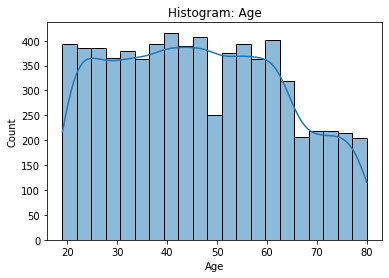

In [35]:
# Age histogram
sns.histplot(df.Age  ,kde=True).set(title='Histogram: Age')

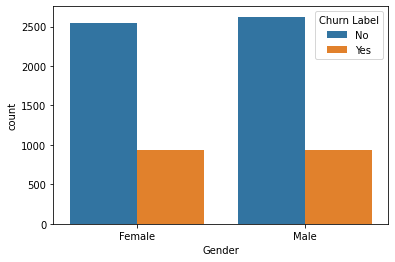

In [36]:
# Relation between Churn and Gender
sns.countplot(data=df,x='Gender',hue='Churn Label')

# Equal Ratio between males and females

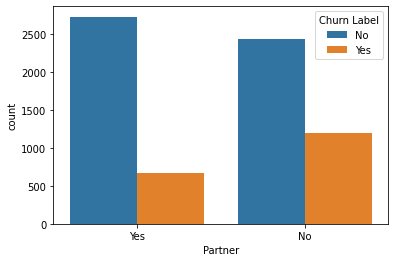

In [37]:
# Relation between Churn and Partner
sns.countplot(data=df,x='Partner',hue='Churn Label')

# Higher churn possibilty in case of marriage

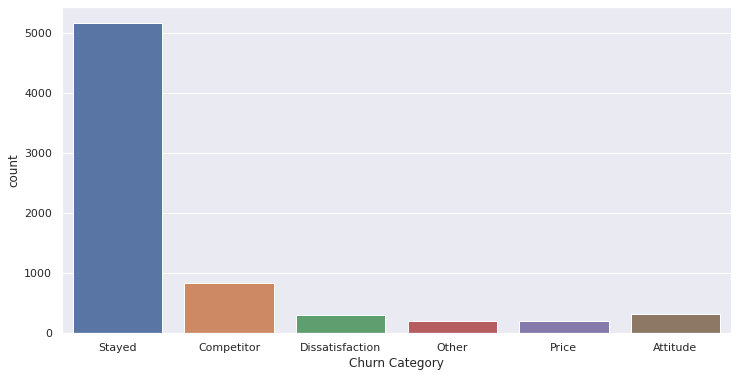

In [38]:
# Diplaying Churn Reasons
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Churn Category',data=df)

# Competitor has a relatively higher ratio

[Text(0.5, 1.0, 'Quarter')]

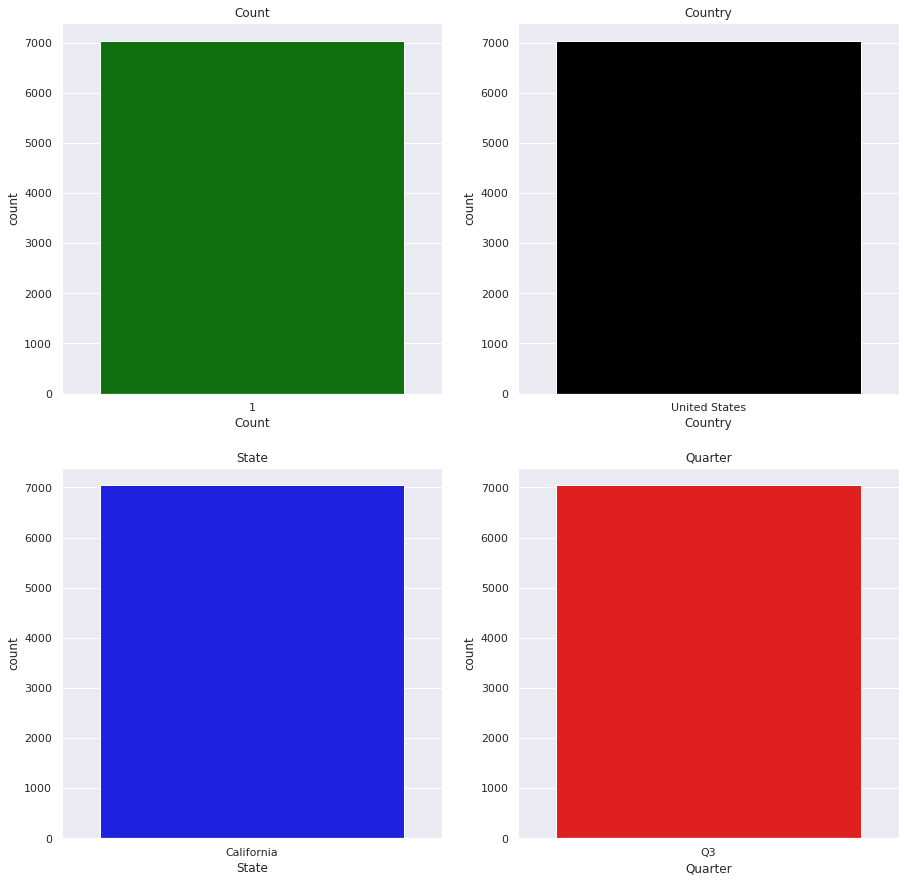

In [39]:
# Count Plot
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(15,15)

sns.countplot(x='Count',data=df, color='green',ax=axes[0,0]).set(title='Count')
sns.countplot(x='Country', data=df, color='black',ax=axes[0,1]).set(title='Country')
sns.countplot(x='State', data=df, color='blue',ax=axes[1,0]).set(title='State')
sns.countplot(x='Quarter', data=df, color='red',ax=axes[1,1]).set(title='Quarter')

# Constant Data over all dataset

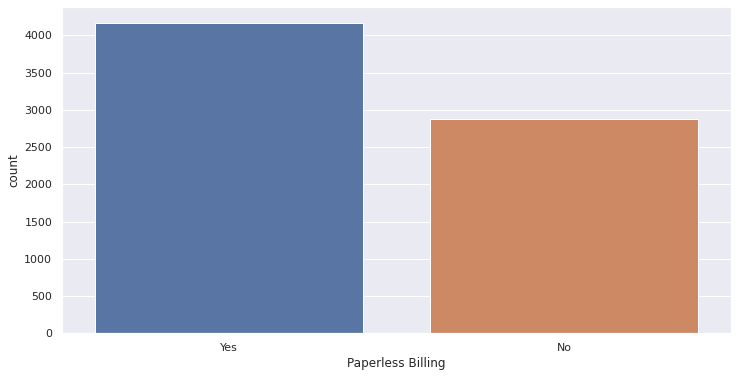

In [40]:
# Differntiaitng according to billing
sns.countplot(x='Paperless Billing', data=df)

[Text(0.5, 1.0, 'Married')]

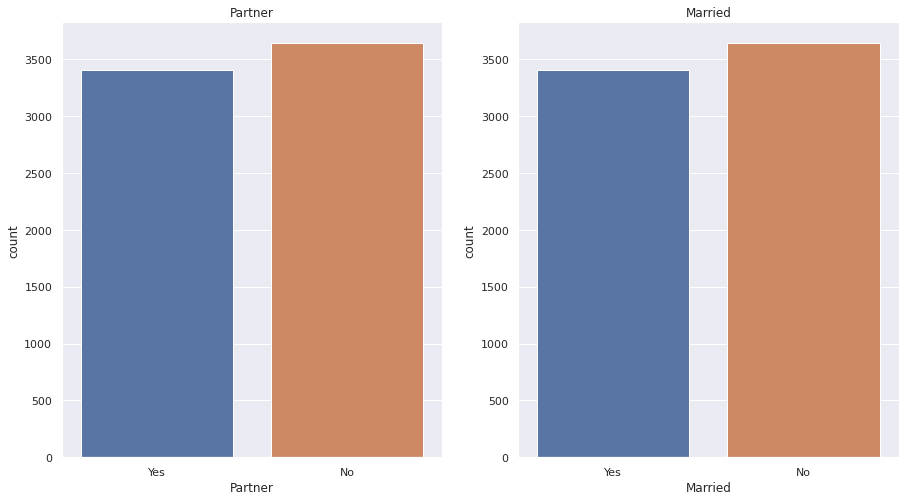

In [41]:
# Partner and Married Histogram
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15,8)

sns.countplot(x='Partner',data=df,ax=axes[0]).set(title='Partner')
sns.countplot(x='Married', data=df ,ax=axes[1]).set(title='Married')

# Two Identical Features

[Text(0.5, 1.0, 'Device Protection Plan')]

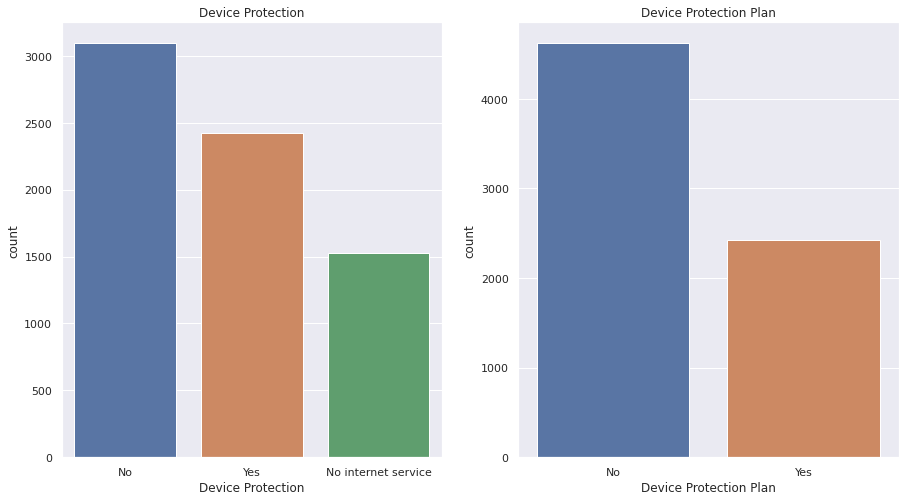

In [42]:
# Device Protection and Device Protection Plan Histogram
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15,8)

sns.countplot(x='Device Protection',data=df ,ax=axes[0]).set(title='Device Protection')
sns.countplot(x='Device Protection Plan', data=df ,ax=axes[1]).set(title='Device Protection Plan')

# Not Identical Features

[Text(0.5, 1.0, 'Internet Type')]

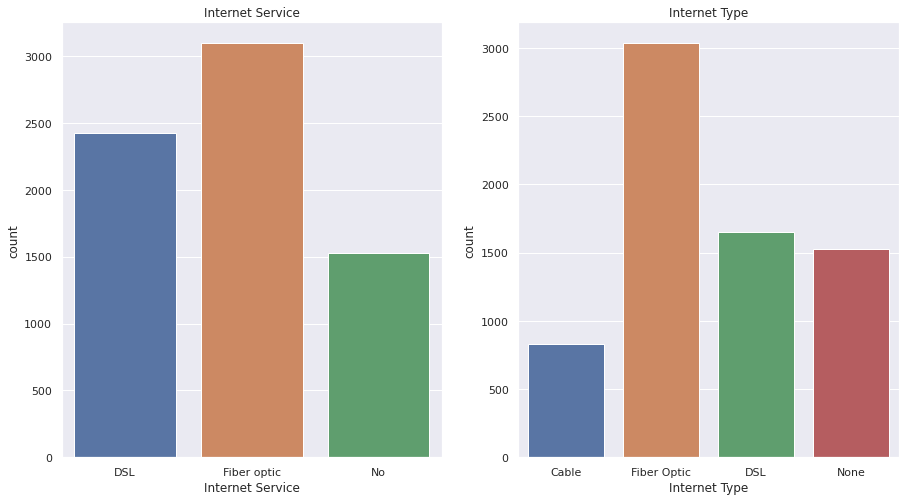

In [43]:
# Internet Service and Internet Type Histogram
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15,8)

sns.countplot(x='Internet Service',data=df, ax=axes[0]).set(title='Internet Service')
sns.countplot(x='Internet Type', data=df, ax=axes[1]).set(title='Internet Type')

# Not Identical Features

[Text(0.5, 1.0, 'Multiple Lines')]

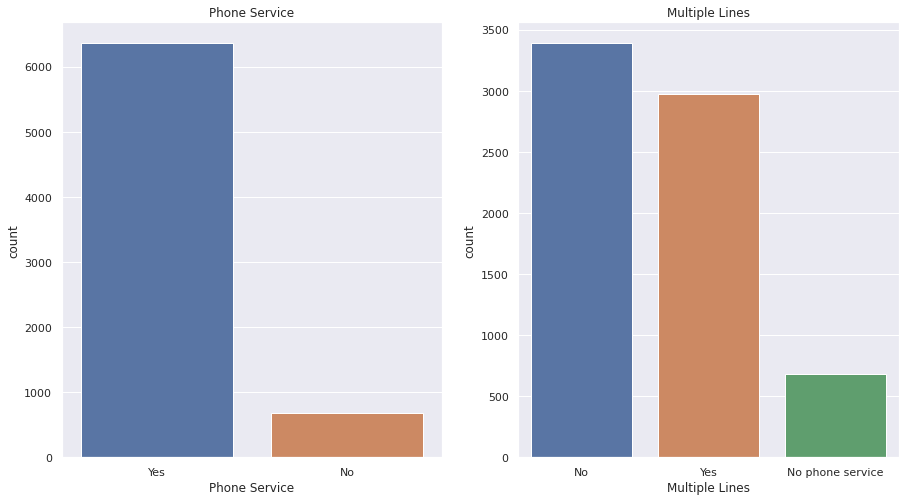

In [44]:
# Phone Service and Multiple Lines Histogram
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15,8)

sns.countplot(x='Phone Service',data=df, ax=axes[0]).set(title='Phone Service')
sns.countplot(x='Multiple Lines', data=df, ax=axes[1]).set(title='Multiple Lines')

# One feature is included in the other

[Text(0.5, 1.0, 'Premium Tech Support')]

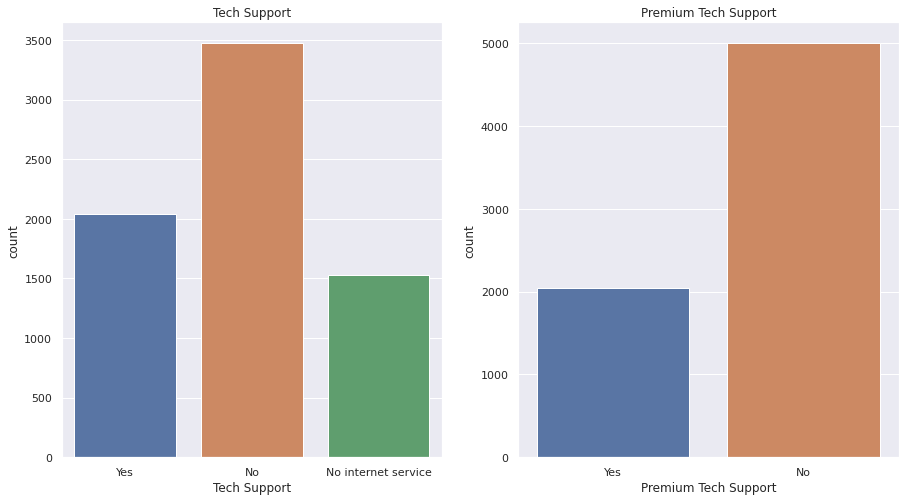

In [45]:
# Tech Support and Premium Tech Support Histogram
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15,8)

sns.countplot(x='Tech Support',data=df ,ax=axes[0]).set(title='Tech Support')
sns.countplot(x='Premium Tech Support', data=df, ax=axes[1]).set(title='Premium Tech Support')

# One feature is included in the other

[Text(0.5, 1.0, 'Tenure in Months')]

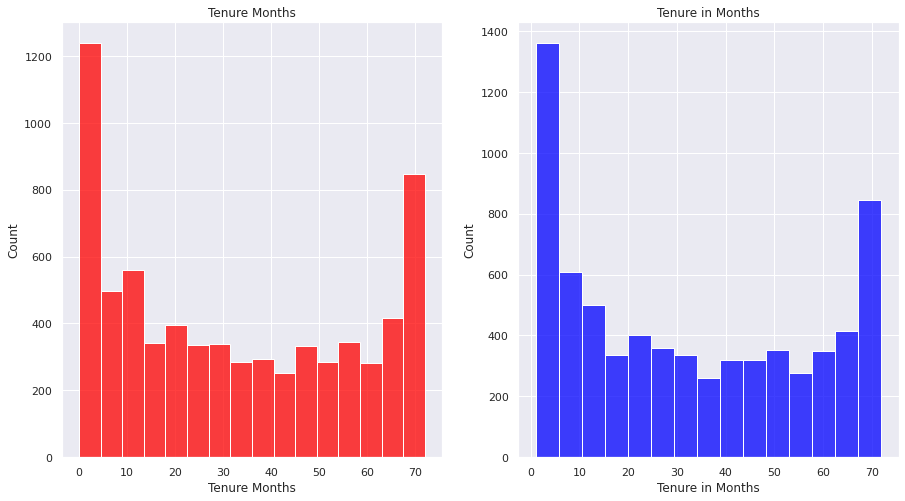

In [46]:
# Tenure Months and Tenure in Months Histogram
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15,8)

sns.histplot(x='Tenure Months',data=df, color='red',ax=axes[0]).set(title='Tenure Months')
sns.histplot(x='Tenure in Months', data=df, color='blue',ax=axes[1]).set(title='Tenure in Months')

# Two Identical Features

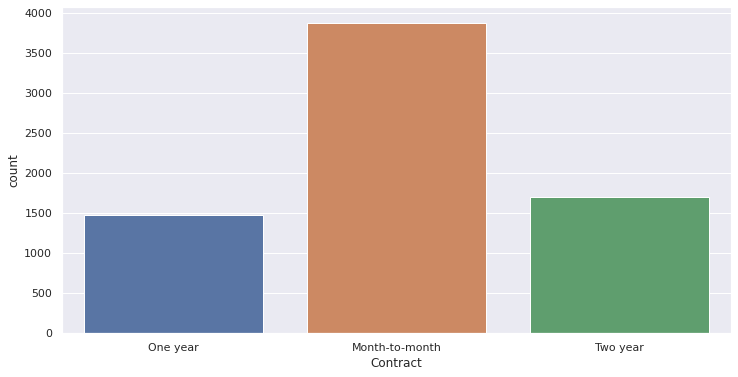

In [47]:
# Differntiating according to contract length
sns.countplot(x='Contract', data=df)

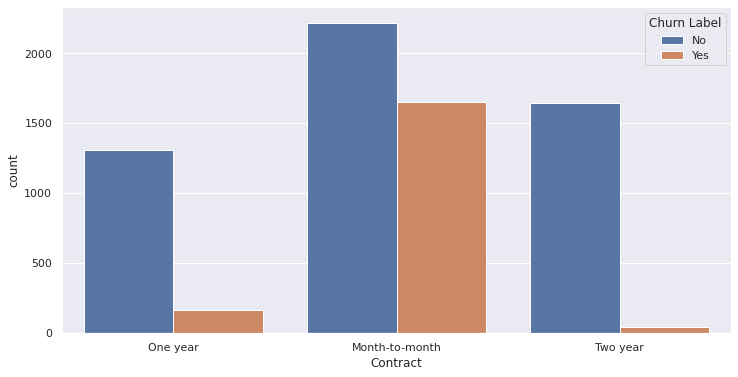

In [48]:
# Differntiating according to contract length with respect to churn ratio
sns.countplot(x='Contract', hue='Churn Label', data=df)

# Higher churn rate at month-month contracts

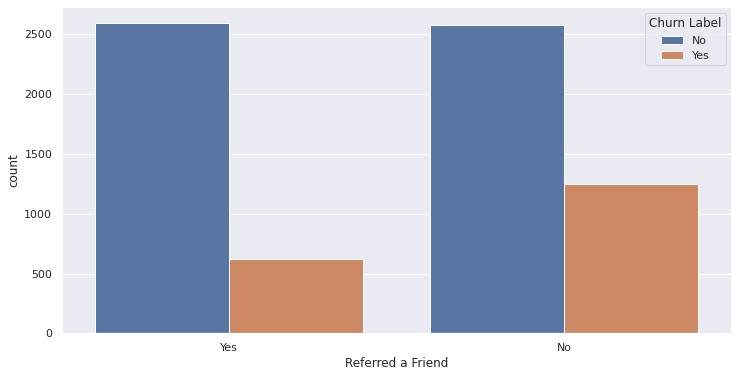

In [49]:
# Differntiating according to Refferals with respect to churn
sns.countplot(x='Referred a Friend', hue='Churn Label', data=df)

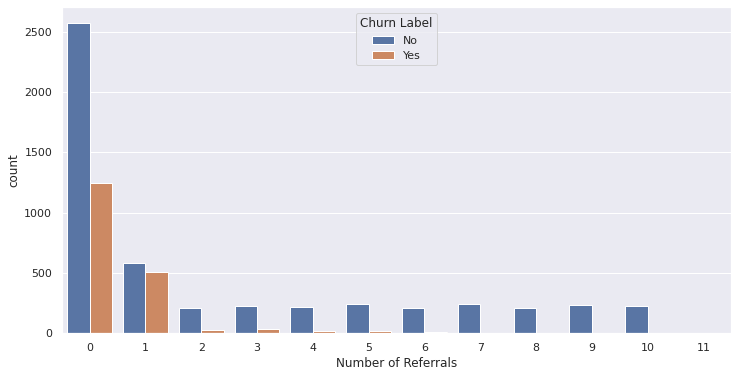

In [50]:
# Differntiating according to contract length
sns.countplot(x='Number of Referrals', hue='Churn Label', data=df)

# Churn ratio decreases by increasing number of referrals

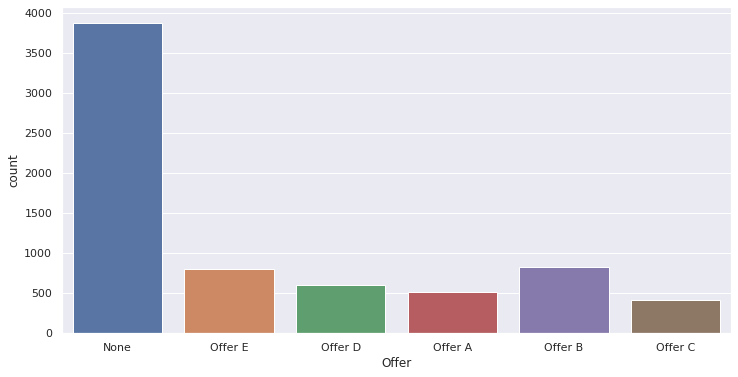

In [51]:
# Differntiating according to offer
sns.countplot(x='Offer', data=df)

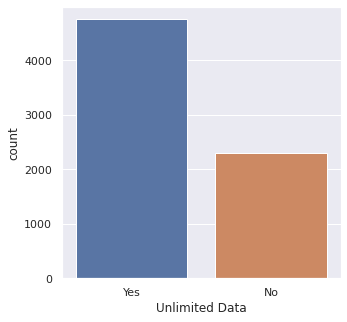

In [121]:
# Differntiating according to Payment Method
sns.countplot(x='Unlimited Data', data=df)

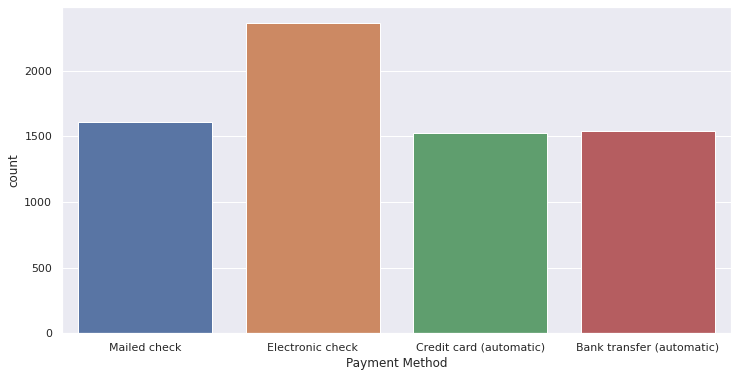

In [52]:
# Differntiating according to Payment Method
sns.countplot(x='Payment Method', data=df)

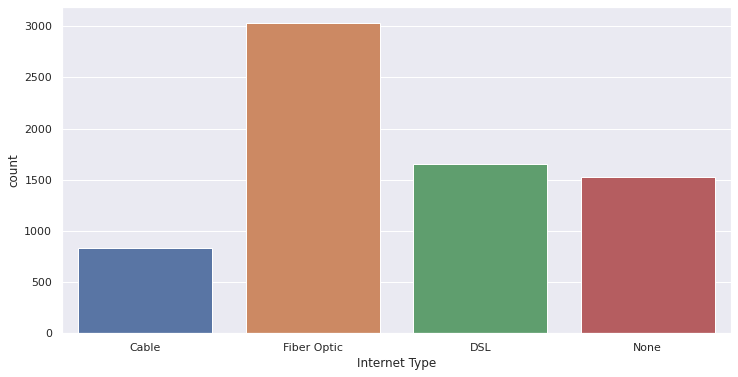

In [53]:
# Differntiating according to Internet Type
sns.countplot(x='Internet Type', data=df)

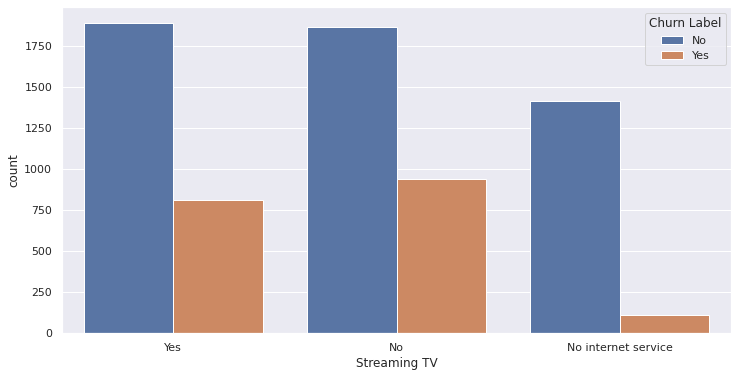

In [54]:
# Relation between Churn and Streaming TV
sns.countplot(data=df,x='Streaming TV',hue='Churn Label')

[Text(0.5, 1.0, 'Total Extra Data Charges')]

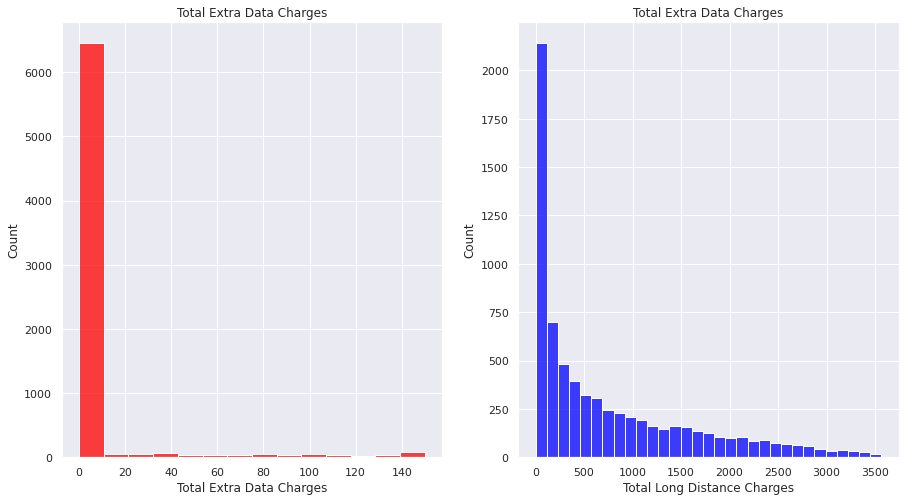

In [104]:
# Total Extra Charges and Total Distance Charges
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15,8)

sns.histplot(x='Total Extra Data Charges',data=df, color='red',ax=axes[0]).set(title='Total Extra Data Charges')
sns.histplot(x='Total Long Distance Charges', data=df, color='blue',ax=axes[1]).set(title='Total Extra Data Charges')

In [55]:
# Correlation between dataset columns
df.drop('Count',axis=1,inplace=True) # Dropping count as its constant 
df.corr()

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,CLTV,Churn Score,Churn Value,Latitude,Longitude,Monthly Charges,Number of Dependents,Number of Referrals,Satisfaction Score,Tenure Months,Tenure in Months,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Zip Code
Age,1.000000,-0.376595,-0.011749,-0.001826,0.084911,0.115760,-0.006263,0.006482,0.144685,-0.119000,-0.025141,-0.085170,0.010202,0.009927,0.025036,0.003065,0.024168,0.048265,-0.004722
Avg Monthly GB Download,-0.376595,1.000000,-0.030455,0.023043,0.021885,0.048868,-0.024277,0.031714,0.391787,0.129966,0.038575,-0.091657,0.049408,0.049119,0.088939,0.011373,0.002397,0.180726,-0.009410
Avg Monthly Long Distance Charges,-0.011749,-0.030455,1.000000,0.023858,0.022085,0.008120,0.004441,-0.006146,0.138396,-0.007324,0.006336,0.001146,0.014705,0.014596,0.002414,0.599828,-0.018644,0.232291,0.007684
CLTV,-0.001826,0.023043,0.023858,1.000000,-0.079782,-0.127463,0.000886,0.000485,0.098693,0.049611,0.122843,0.075811,0.396406,0.396292,0.042540,0.282189,0.007992,0.354198,-0.003562
Churn Score,0.084911,0.021885,0.022085,-0.079782,1.000000,0.664897,-0.007684,0.004260,0.133754,-0.161659,-0.202738,-0.497979,-0.224987,-0.225447,0.009107,-0.135793,-0.013171,-0.137772,-0.002769
Churn Value,0.115760,0.048868,0.008120,-0.127463,0.664897,1.000000,-0.003384,0.004594,0.193356,-0.218780,-0.286540,-0.754649,-0.352229,-0.352861,0.007139,-0.223756,-0.033709,-0.223003,0.003346
Latitude,-0.006263,-0.024277,0.004441,0.000886,-0.007684,-0.003384,1.000000,-0.876779,-0.019899,0.019869,0.006030,-0.004706,-0.001631,-0.001776,-0.013515,-0.002091,-0.011132,-0.008613,0.895743
Longitude,0.006482,0.031714,-0.006146,0.000485,0.004260,0.004594,-0.876779,1.000000,0.024098,-0.018618,-0.003197,0.004131,-0.001678,-0.001616,0.011544,-0.000591,-0.001886,0.006950,-0.784271
Monthly Charges,0.144685,0.391787,0.138396,0.098693,0.133754,0.193356,-0.019899,0.024098,1.000000,-0.131837,0.028173,-0.223922,0.247900,0.247582,0.126244,0.246300,0.033482,0.588887,-0.004596
Number of Dependents,-0.119000,0.129966,-0.007324,0.049611,-0.161659,-0.218780,0.019869,-0.018618,-0.131837,1.000000,0.278003,0.152873,0.107689,0.108237,-0.014436,0.068966,0.014023,0.038038,0.011910


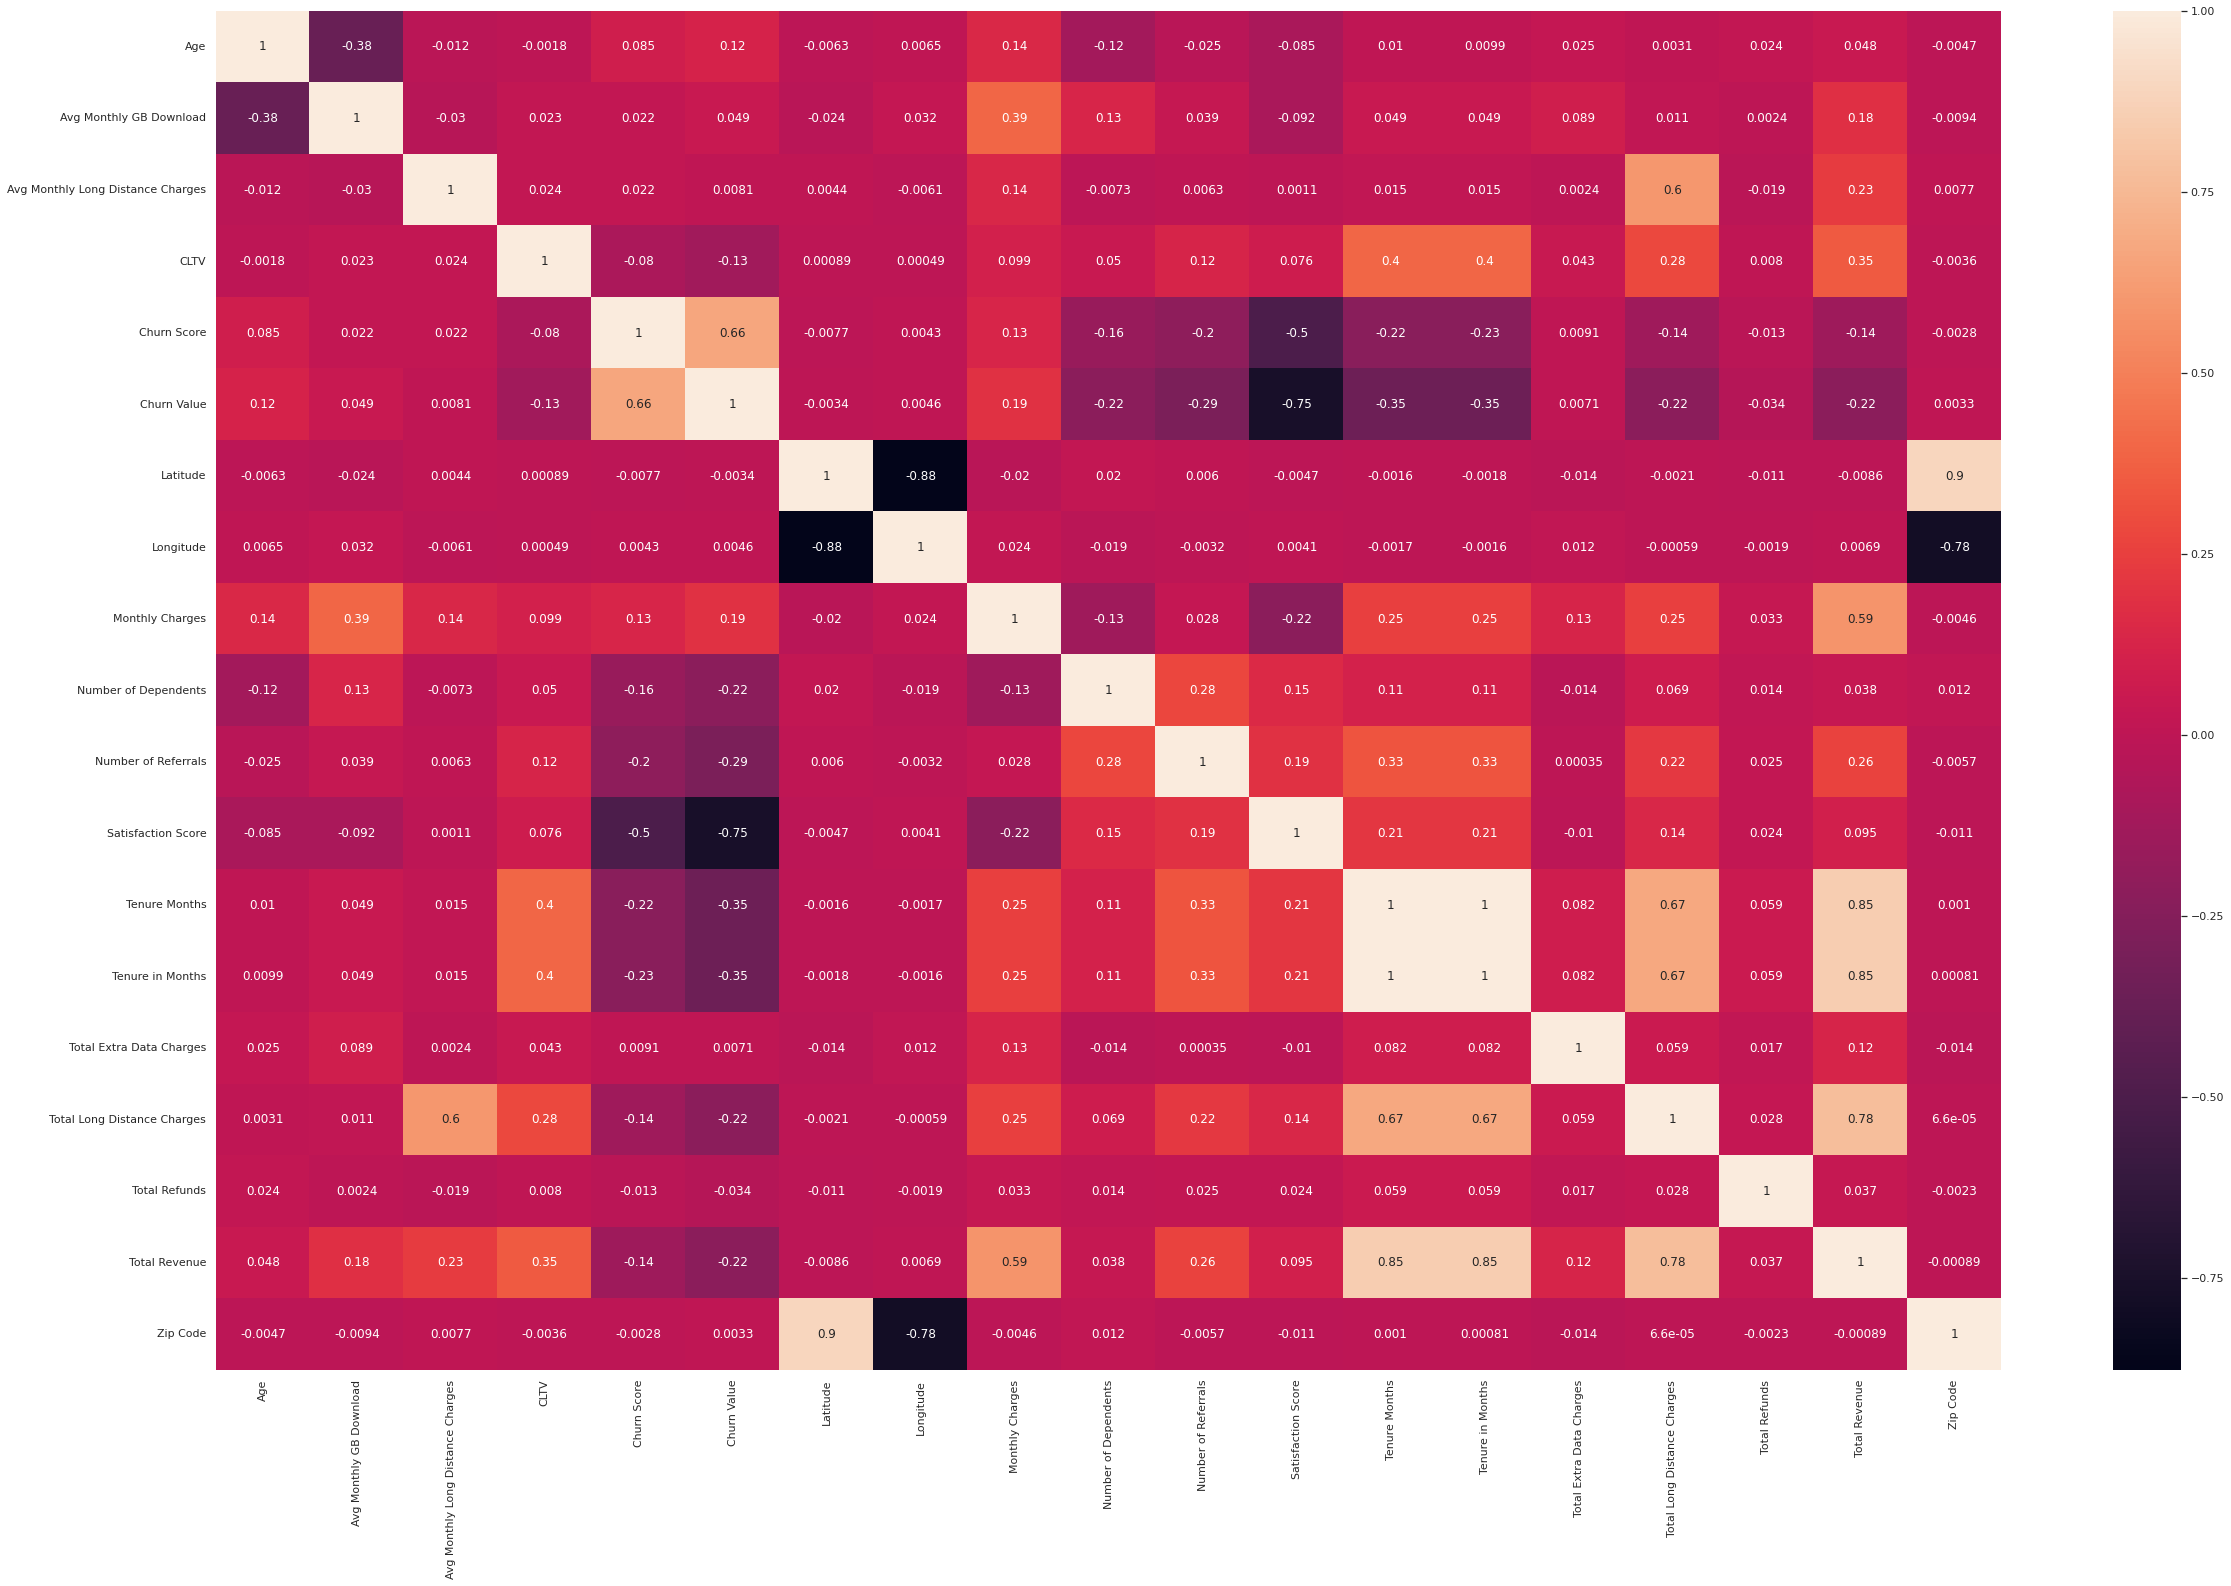

In [56]:
#Visualizing the correlation between the features:
sns.set(rc={'figure.figsize':(40,25)})
sns.heatmap(df.corr(),annot=True)

## Comments

*There are constant data throughout all dataset.

*There are many features containing output: 
Churn Label - Churn Value - Churn Score - Customer Staus - Satisfaction Score.

*There are features that don't affect output like: Gender.

*There are features that are identical like: Married and Partner.

*There are features that are included in another features like: Phone Service and multiple lines.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

# C) Machine Learning 

## Train Test Split

In [127]:
x = df.drop(['Churn Reason','Churn Score','Churn Label','State','Phone Service','Device Protection Plan',
             'Zip Code','Quarter','Premium Tech Support','Country','Customer Status','Under 30',
             'Gender','Churn Category','Internet Service','Tenure Months','Total Charges',
             'Lat Long','Married','Dependents','Referred a Friend','Churn Value'],axis=1)
y = df['Churn Value']

print(len(list(x.columns)))

x.columns

33


Index(['Age', 'Avg Monthly GB Download', 'Avg Monthly Long Distance Charges',
       'CLTV', 'City', 'Contract', 'Device Protection', 'Internet Type',
       'Latitude', 'Longitude', 'Monthly Charges', 'Multiple Lines',
       'Number of Dependents', 'Number of Referrals', 'Offer', 'Online Backup',
       'Online Security', 'Paperless Billing', 'Partner', 'Payment Method',
       'Population', 'Satisfaction Score', 'Senior Citizen',
       'Streaming Movies', 'Streaming Music', 'Streaming TV', 'Tech Support',
       'Tenure in Months', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Refunds', 'Total Revenue',
       'Unlimited Data'],
      dtype='object')

In [128]:
for i in list(x.columns):
  print(str(i) + ": " + str(type(x[i].dtypes)))

Age: <class 'numpy.dtype[int64]'>
Avg Monthly GB Download: <class 'numpy.dtype[int64]'>
Avg Monthly Long Distance Charges: <class 'numpy.dtype[float64]'>
CLTV: <class 'numpy.dtype[int64]'>
City: <class 'numpy.dtype[object_]'>
Contract: <class 'numpy.dtype[object_]'>
Device Protection: <class 'numpy.dtype[object_]'>
Internet Type: <class 'numpy.dtype[object_]'>
Latitude: <class 'numpy.dtype[float64]'>
Longitude: <class 'numpy.dtype[float64]'>
Monthly Charges: <class 'numpy.dtype[float64]'>
Multiple Lines: <class 'numpy.dtype[object_]'>
Number of Dependents: <class 'numpy.dtype[int64]'>
Number of Referrals: <class 'numpy.dtype[int64]'>
Offer: <class 'numpy.dtype[object_]'>
Online Backup: <class 'numpy.dtype[object_]'>
Online Security: <class 'numpy.dtype[object_]'>
Paperless Billing: <class 'numpy.dtype[object_]'>
Partner: <class 'numpy.dtype[object_]'>
Payment Method: <class 'numpy.dtype[object_]'>
Population: <class 'numpy.dtype[object_]'>
Satisfaction Score: <class 'numpy.dtype[int64]

In [129]:
# Label Encoding
le = LabelEncoder()
features = list(x.columns)
for feature in features:
  if str(x[feature].dtypes) == "object":
    label = le.fit_transform(x[feature])
    x.drop(feature, axis=1, inplace=True)
    x[feature] = label

In [130]:
for i in list(x.columns):
  print(str(i) + ": " + str(type(x[i].dtypes)))

Age: <class 'numpy.dtype[int64]'>
Avg Monthly GB Download: <class 'numpy.dtype[int64]'>
Avg Monthly Long Distance Charges: <class 'numpy.dtype[float64]'>
CLTV: <class 'numpy.dtype[int64]'>
Latitude: <class 'numpy.dtype[float64]'>
Longitude: <class 'numpy.dtype[float64]'>
Monthly Charges: <class 'numpy.dtype[float64]'>
Number of Dependents: <class 'numpy.dtype[int64]'>
Number of Referrals: <class 'numpy.dtype[int64]'>
Satisfaction Score: <class 'numpy.dtype[int64]'>
Tenure in Months: <class 'numpy.dtype[int64]'>
Total Extra Data Charges: <class 'numpy.dtype[int64]'>
Total Long Distance Charges: <class 'numpy.dtype[float64]'>
Total Refunds: <class 'numpy.dtype[float64]'>
Total Revenue: <class 'numpy.dtype[float64]'>
City: <class 'numpy.dtype[int64]'>
Contract: <class 'numpy.dtype[int64]'>
Device Protection: <class 'numpy.dtype[int64]'>
Internet Type: <class 'numpy.dtype[int64]'>
Multiple Lines: <class 'numpy.dtype[int64]'>
Offer: <class 'numpy.dtype[int64]'>
Online Backup: <class 'numpy.

In [131]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## Logistic Regression

In [132]:
# Logistic Regression Fitting
Logmodel = LogisticRegression(max_iter=10000)
Logmodel.fit(x_train,y_train)
y_pred = Logmodel.predict(x_test)

# Classification Report
class_report = classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1036
           1       0.93      0.90      0.92       373

    accuracy                           0.96      1409
   macro avg       0.95      0.94      0.94      1409
weighted avg       0.96      0.96      0.96      1409



In [133]:
# Trying Changing Threshold
decisions = (Logmodel.predict_proba(x_test) >= 0.3).astype(int)[:,1]

class_report = classification_report(y_test,decisions)
print(class_report)

#Performance Decreases

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1036
           1       0.88      0.94      0.91       373

    accuracy                           0.95      1409
   macro avg       0.93      0.95      0.94      1409
weighted avg       0.95      0.95      0.95      1409



[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

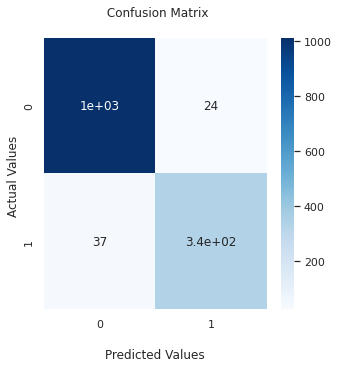

In [134]:
# Displaying Confusion Matrix
cf_matrix = confusion_matrix(y_test,y_pred)
sns.set(rc={'figure.figsize':(5,5)})
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

In [135]:
#Model Evaluation
accuracy  = metrics.accuracy_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
f1_score = metrics.f1_score(y_test,y_pred)

print(f'Model Accuracy = {100*accuracy:0.3} %' )
print(f'Model recall = {100*recall:0.3} %' )
print(f'Model precision = {100*precision:0.3} %' )
print(f'Model f1_score = {100*f1_score:0.3} %' )

Model Accuracy = 95.7 %
Model recall = 90.1 %
Model precision = 93.3 %
Model f1_score = 91.7 %


Text(0, 0.5, 'True Positive Rate (Sensitivity)')

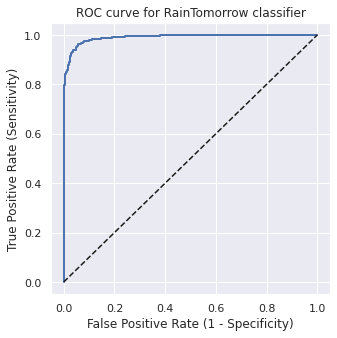

In [136]:
#ROC Curve
y_pred_proba = Logmodel.predict_proba(x_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [137]:
# ROC Evaluation
ROC_AUC = metrics.roc_auc_score(y_test,y_pred_proba)
print(f'Model ROC_AUC = {100*ROC_AUC:0.3} %' )

Model ROC_AUC = 99.0 %


## KNN Algorithm

(0.0, 10.0)

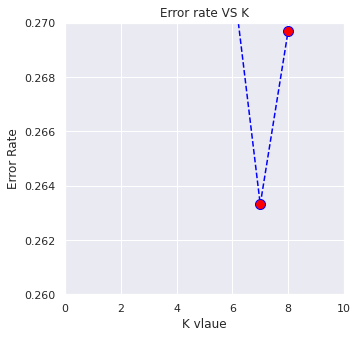

In [141]:
# KNN Tuning
error_rate = []

for i in range(1,50):
  Knn_tuning = KNeighborsClassifier(n_neighbors=i)
  Knn_tuning.fit(x_train,y_train)
  predict_i= Knn_tuning.predict(x_test)
  error_rate.append(np.mean(predict_i != y_test))

plt.plot(range(1,50), error_rate, color='blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title("Error rate VS K")
plt.xlabel('K vlaue')
plt.ylabel('Error Rate')

plt.ylim(0.26,0.27)
plt.xlim(0,10)

In [142]:
# KNN Algorithm Fitting (Optimum k=7)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

class_report = metrics.classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.78      0.90      0.83      1036
           1       0.50      0.29      0.37       373

    accuracy                           0.74      1409
   macro avg       0.64      0.59      0.60      1409
weighted avg       0.71      0.74      0.71      1409



[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

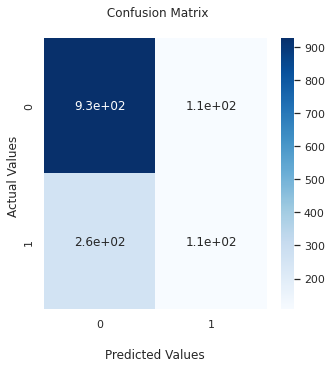

In [143]:
# Displaying Confusion Matrix
cf_matrix = confusion_matrix(y_test,y_pred)
sns.set(rc={'figure.figsize':(5,5)})
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

In [144]:
#Model Evaluation
accuracy  = metrics.accuracy_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
f1_score = metrics.f1_score(y_test,y_pred)

print(f'Model Accuracy = {100*accuracy:0.3} %' )
print(f'Model recall = {100*recall:0.3} %' )
print(f'Model precision = {100*precision:0.3} %' )
print(f'Model f1_score = {100*f1_score:0.3} %' )

Model Accuracy = 73.7 %
Model recall = 29.2 %
Model precision = 50.5 %
Model f1_score = 37.0 %


Text(0, 0.5, 'True Positive Rate (Sensitivity)')

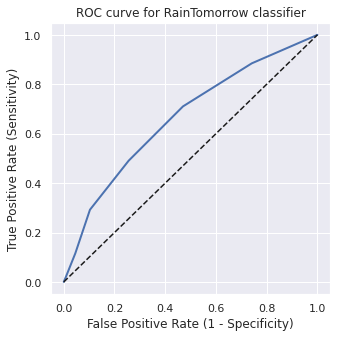

In [145]:
#ROC Curve
y_pred_proba = knn.predict_proba(x_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [146]:
# ROC Evaluation
ROC_AUC = metrics.roc_auc_score(y_test,y_pred_proba)
print(f'Model ROC_AUC = {100*ROC_AUC:0.3} %' )

Model ROC_AUC = 66.3 %


## SVM Algorithm 

In [147]:
# SVM Algorithm Fitting
svm_model = svm.SVC(probability=True)
svm_model.fit(x_train,y_train)
y_pred = svm_model.predict(x_test)


class_report = metrics.classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1036
           1       0.00      0.00      0.00       373

    accuracy                           0.74      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.74      0.62      1409



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

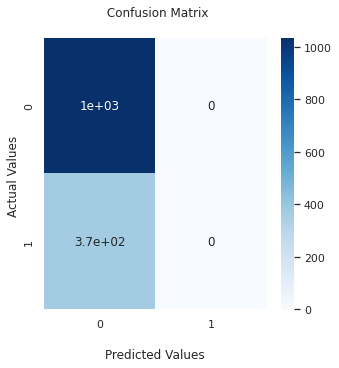

In [148]:
# Displaying Confusion Matrix
cf_matrix = confusion_matrix(y_test,y_pred)
sns.set(rc={'figure.figsize':(5,5)})
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

In [149]:
#Model Evaluation
accuracy  = metrics.accuracy_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
f1_score = metrics.f1_score(y_test,y_pred)

print(f'Model Accuracy = {100*accuracy:0.3} %' )
print(f'Model recall = {100*recall:0.3} %' )
print(f'Model precision = {100*precision:0.3} %' )
print(f'Model f1_score = {100*f1_score:0.3} %' )

Model Accuracy = 73.5 %
Model recall = 0.0 %
Model precision = 0.0 %
Model f1_score = 0.0 %


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0, 0.5, 'True Positive Rate (Sensitivity)')

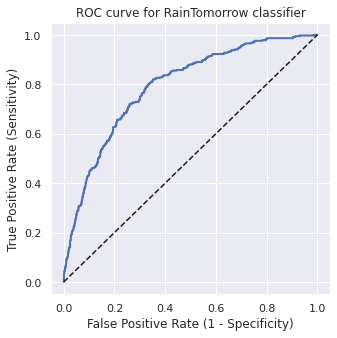

In [150]:
#ROC Curve
y_pred_proba = svm_model.predict_proba(x_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [151]:
# ROC Evaluation
ROC_AUC = metrics.roc_auc_score(y_test,y_pred_proba)
print(f'Model ROC_AUC = {100*ROC_AUC:0.3} %' )

Model ROC_AUC = 79.2 %


## Decision Tree

In [152]:
# Decision Tree Fitting
DT_model = DecisionTreeClassifier()
DT_model.fit(x_train,y_train)
y_pred = DT_model.predict(x_test)

class_report = metrics.classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1036
           1       0.86      0.88      0.87       373

    accuracy                           0.93      1409
   macro avg       0.91      0.92      0.91      1409
weighted avg       0.93      0.93      0.93      1409



[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

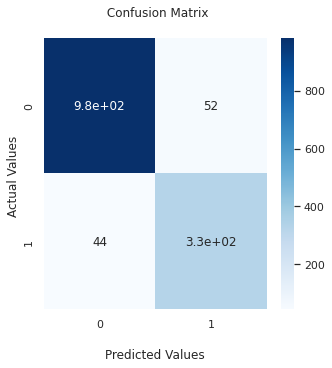

In [153]:
# Displaying Confusion Matrix
cf_matrix = confusion_matrix(y_test,y_pred)
sns.set(rc={'figure.figsize':(5,5)})
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

In [154]:
#Model Evaluation
accuracy  = metrics.accuracy_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
f1_score = metrics.f1_score(y_test,y_pred)

print(f'Model Accuracy = {100*accuracy:0.3} %' )
print(f'Model recall = {100*recall:0.3} %' )
print(f'Model precision = {100*precision:0.3} %' )
print(f'Model f1_score = {100*f1_score:0.3} %' )

Model Accuracy = 93.2 %
Model recall = 88.2 %
Model precision = 86.4 %
Model f1_score = 87.3 %


Text(0, 0.5, 'True Positive Rate (Sensitivity)')

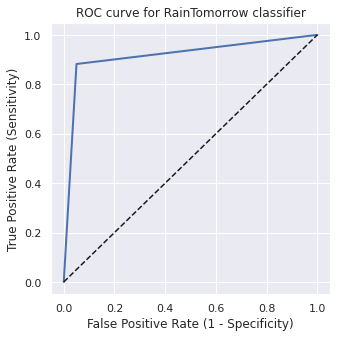

In [155]:
#ROC Curve
y_pred_proba = DT_model.predict_proba(x_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [156]:
# ROC Evaluation
ROC_AUC = metrics.roc_auc_score(y_test,y_pred_proba)
print(f'Model ROC_AUC = {100*ROC_AUC:0.3} %' )

Model ROC_AUC = 91.6 %


In [157]:
# Exporting Tree0
columns_name = list(x.columns)
tree_text = tree.export_text(DT_model, feature_names=columns_name)

print(tree_text)

|--- Satisfaction Score <= 2.50
|   |--- class: 1
|--- Satisfaction Score >  2.50
|   |--- Satisfaction Score <= 3.50
|   |   |--- Online Security <= 0.50
|   |   |   |--- Tenure in Months <= 5.50
|   |   |   |   |--- Monthly Charges <= 70.75
|   |   |   |   |   |--- Total Revenue <= 305.08
|   |   |   |   |   |   |--- Number of Referrals <= 4.00
|   |   |   |   |   |   |   |--- Device Protection <= 1.00
|   |   |   |   |   |   |   |   |--- Total Revenue <= 56.65
|   |   |   |   |   |   |   |   |   |--- Total Revenue <= 32.28
|   |   |   |   |   |   |   |   |   |   |--- Monthly Charges <= 25.15
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- Monthly Charges >  25.15
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Total Revenue >  32.28
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Total Revenue >  56.65
|   |   |   |   |   |   |   |   | 

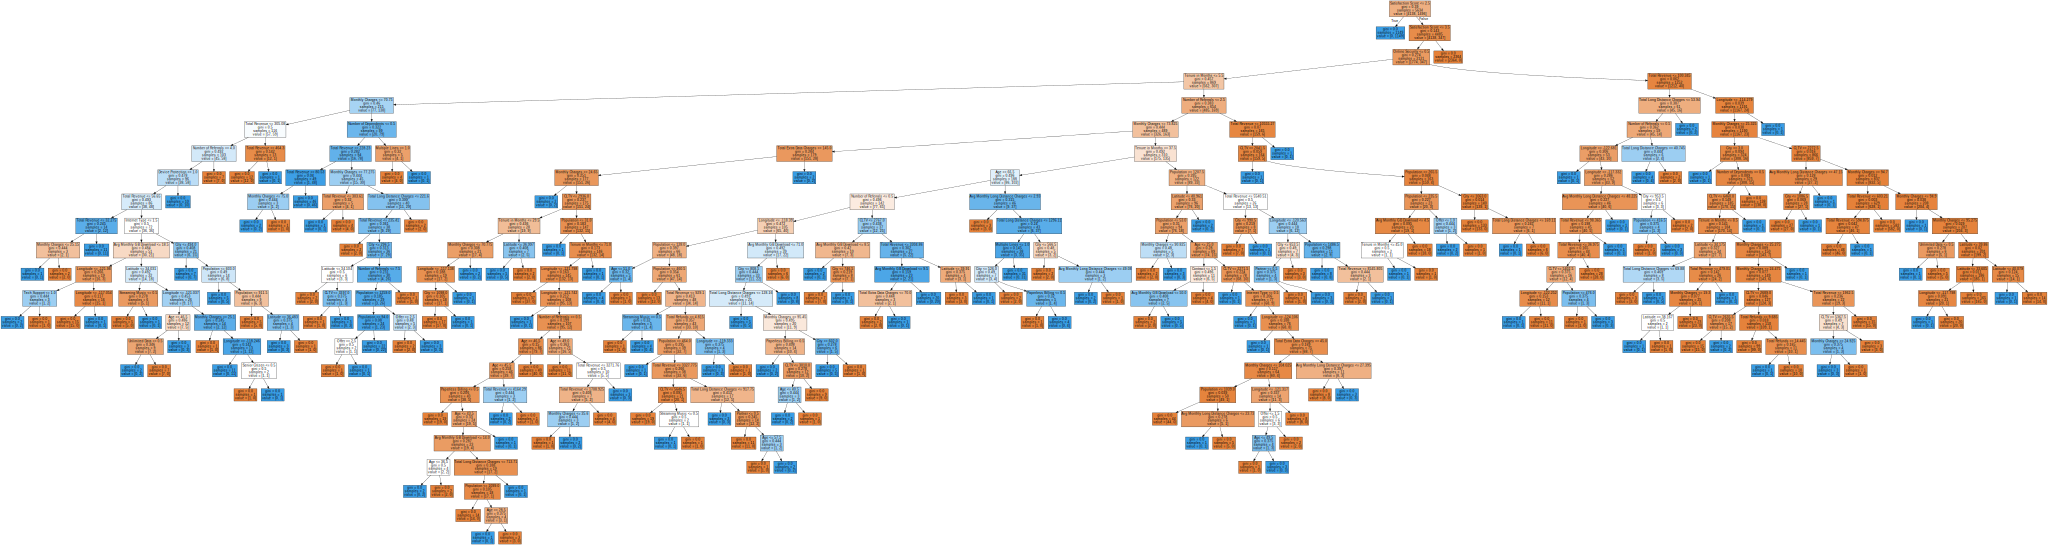

In [158]:
# Visualizing Tree
data_dot = tree.export_graphviz(DT_model,feature_names=columns_name, filled=True)
graph = graphviz.Source(data_dot,format='png')

graph

Text(0.5, 0, 'Relative Importance')

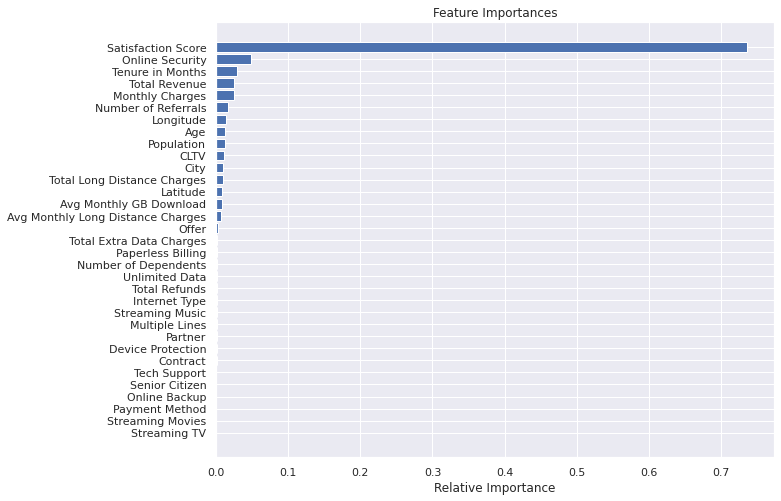

In [159]:
#Feature Importance
features = x.columns
importances = DT_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

## Random Forest

In [160]:
# Random Forest Fitting
RF_model = RandomForestClassifier()
RF_model.fit(x_train,y_train)
y_pred = RF_model.predict(x_test)

class_report = metrics.classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1036
           1       0.97      0.86      0.91       373

    accuracy                           0.95      1409
   macro avg       0.96      0.92      0.94      1409
weighted avg       0.95      0.95      0.95      1409



[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

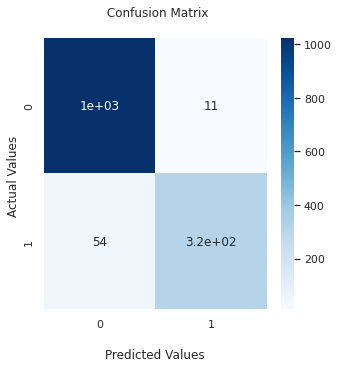

In [161]:
# Displaying Confusion Matrix
cf_matrix = confusion_matrix(y_test,y_pred)
sns.set(rc={'figure.figsize':(5,5)})
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

In [162]:
#Model Evaluation
accuracy  = metrics.accuracy_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
f1_score = metrics.f1_score(y_test,y_pred)

print(f'Model Accuracy = {100*accuracy:0.3} %' )
print(f'Model recall = {100*recall:0.3} %' )
print(f'Model precision = {100*precision:0.3} %' )
print(f'Model f1_score = {100*f1_score:0.3} %' )

Model Accuracy = 95.4 %
Model recall = 85.5 %
Model precision = 96.7 %
Model f1_score = 90.8 %


Text(0, 0.5, 'True Positive Rate (Sensitivity)')

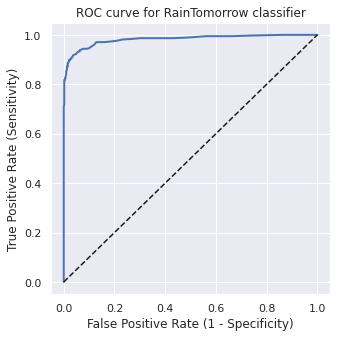

In [163]:
#ROC Curve
y_pred_proba = RF_model.predict_proba(x_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [164]:
# ROC Evaluation
ROC_AUC = metrics.roc_auc_score(y_test,y_pred_proba)
print(f'Model ROC_AUC = {100*ROC_AUC:0.3} %' )

Model ROC_AUC = 98.2 %


In [165]:
# Exporting Random Forest
columns_name = list(x.columns)

for tree_model in RF_model.estimators_:
  tree_text = tree.export_text(tree_model, feature_names=columns_name )

  print(tree_text)

Streaming output truncated to the last 5000 lines.
|   |   |   |   |--- Number of Referrals <= 2.50
|   |   |   |   |   |--- Population <= 1575.50
|   |   |   |   |   |   |--- Monthly Charges <= 99.85
|   |   |   |   |   |   |   |--- Longitude <= -123.98
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- Longitude >  -123.98
|   |   |   |   |   |   |   |   |--- City <= 30.00
|   |   |   |   |   |   |   |   |   |--- Avg Monthly Long Distance Charges <= 29.06
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   |--- Avg Monthly Long Distance Charges >  29.06
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- City >  30.00
|   |   |   |   |   |   |   |   |   |--- City <= 827.50
|   |   |   |   |   |   |   |   |   |   |--- Longitude <= -118.21
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- Longitude >  -118

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



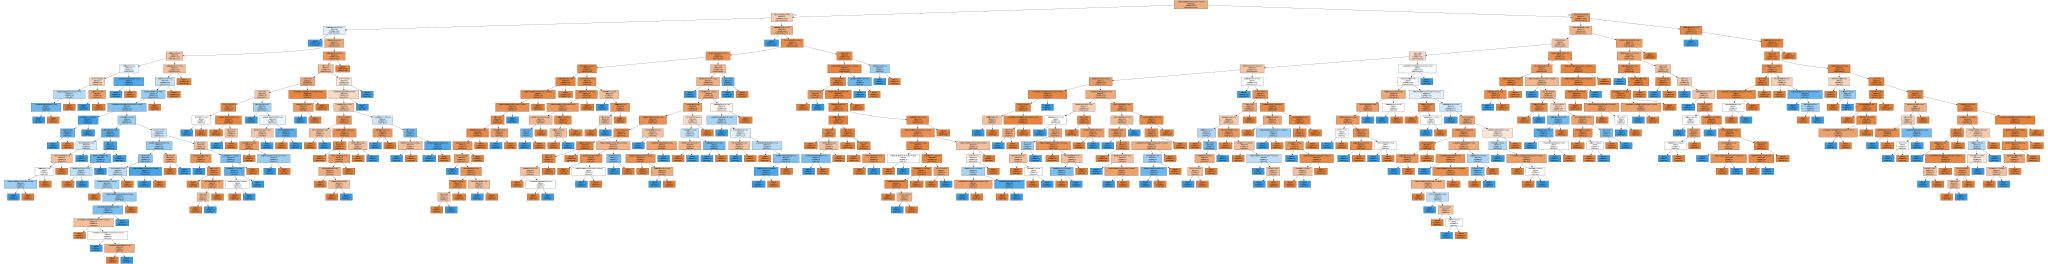

In [166]:
# Visualizing Random Forest
for tree_model in RF_model.estimators_:
  data_dot = tree.export_graphviz(tree_model,feature_names=columns_name, filled=True)
  graph = graphviz.Source(data_dot,format='png')

graph

Text(0.5, 0, 'Relative Importance')

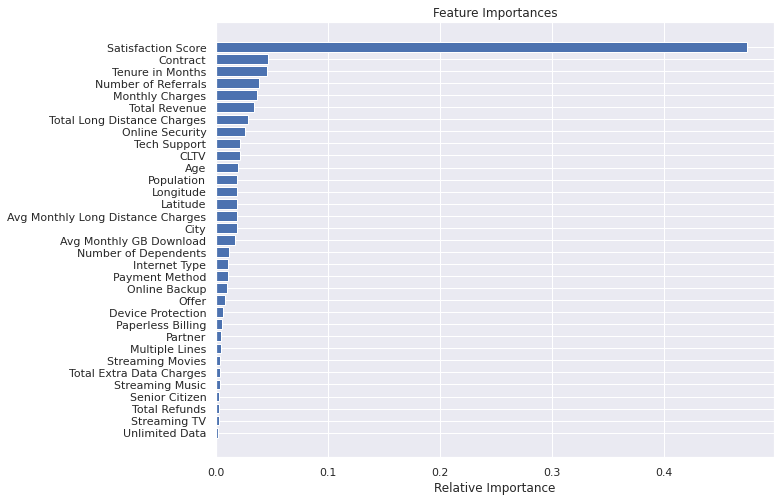

In [167]:
#Feature Importance
features = x.columns
importances = RF_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

## XGboost

In [168]:
# XGBoost Fitting
XGB_model = XGBClassifier()
XGB_model.fit(x_train,y_train)
y_pred = XGB_model.predict(x_test)

class_report = metrics.classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1036
           1       0.96      0.89      0.92       373

    accuracy                           0.96      1409
   macro avg       0.96      0.94      0.95      1409
weighted avg       0.96      0.96      0.96      1409



[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

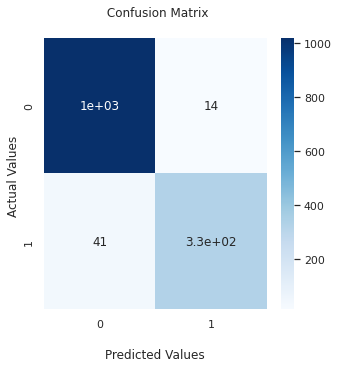

In [169]:
# Displaying Confusion Matrix
cf_matrix = confusion_matrix(y_test,y_pred)
sns.set(rc={'figure.figsize':(5,5)})
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

In [170]:
#Model Evaluation
accuracy  = metrics.accuracy_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
f1_score = metrics.f1_score(y_test,y_pred)

print(f'Model Accuracy = {100*accuracy:0.3} %' )
print(f'Model recall = {100*recall:0.3} %' )
print(f'Model precision = {100*precision:0.3} %' )
print(f'Model f1_score = {100*f1_score:0.3} %' )

Model Accuracy = 96.1 %
Model recall = 89.0 %
Model precision = 96.0 %
Model f1_score = 92.4 %


Text(0, 0.5, 'True Positive Rate (Sensitivity)')

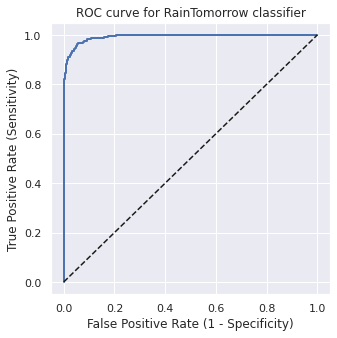

In [171]:
#ROC Curve
y_pred_proba = XGB_model.predict_proba(x_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [172]:
# ROC Evaluation
ROC_AUC = metrics.roc_auc_score(y_test,y_pred_proba)
print(f'Model ROC_AUC = {100*ROC_AUC:0.3} %' )

Model ROC_AUC = 99.3 %


## Naive Bayes

In [173]:
# Naive Bayes Fitting
Nb_model = GaussianNB()
Nb_model.fit(x_train,y_train)
y_pred = Nb_model.predict(x_test)

class_report = metrics.classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      1036
           1       0.68      0.87      0.76       373

    accuracy                           0.86      1409
   macro avg       0.81      0.86      0.83      1409
weighted avg       0.88      0.86      0.86      1409



[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

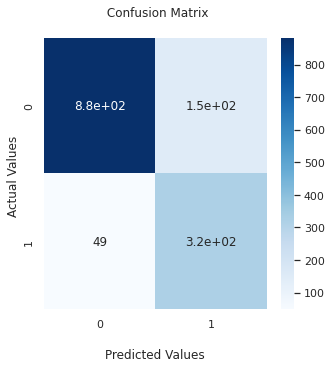

In [174]:
# Displaying Confusion Matrix
cf_matrix = confusion_matrix(y_test,y_pred)
sns.set(rc={'figure.figsize':(5,5)})
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

In [175]:
#Model Evaluation
accuracy  = metrics.accuracy_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
f1_score = metrics.f1_score(y_test,y_pred)

print(f'Model Accuracy = {100*accuracy:0.3} %' )
print(f'Model recall = {100*recall:0.3} %' )
print(f'Model precision = {100*precision:0.3} %' )
print(f'Model f1_score = {100*f1_score:0.3} %' )

Model Accuracy = 85.7 %
Model recall = 86.9 %
Model precision = 67.9 %
Model f1_score = 76.2 %


Text(0, 0.5, 'True Positive Rate (Sensitivity)')

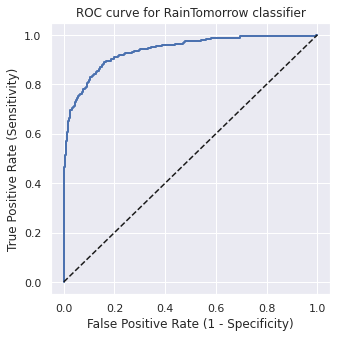

In [176]:
#ROC Curve
y_pred_proba = Nb_model.predict_proba(x_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [177]:
# ROC Evaluation
ROC_AUC = metrics.roc_auc_score(y_test,y_pred_proba)
print(f'Model ROC_AUC = {100*ROC_AUC:0.3} %' )

Model ROC_AUC = 93.7 %


## Ensembling


In [178]:
# Ensembling Fitting
model_1 = LogisticRegression(max_iter=10000)
model_2 = KNeighborsClassifier(n_neighbors=7)
model_3 = svm.SVC(probability=True)
model_4 = DecisionTreeClassifier()
model_5 = RandomForestClassifier()
model_6 = XGBClassifier()
model_7 = GaussianNB()


final_model = VotingClassifier(
    estimators=[("LR", model_1),("KNN", model_2),("SVM", model_3),("DT", model_4),("RF", model_5),
                ("XGB", model_6),("NB", model_7) ],voting='soft', weights=[2,1,1,3,4,4,1]
)

final_model.fit(x_train,y_train)
y_pred = final_model.predict(x_test)

class_report = metrics.classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1036
           1       0.94      0.88      0.91       373

    accuracy                           0.95      1409
   macro avg       0.95      0.93      0.94      1409
weighted avg       0.95      0.95      0.95      1409



[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

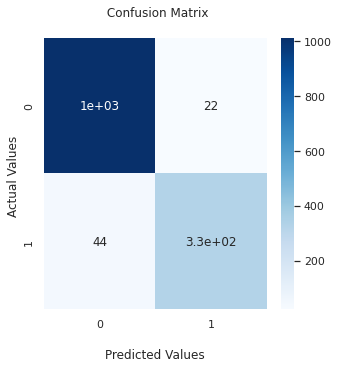

In [179]:
# Displaying Confusion Matrix
cf_matrix = confusion_matrix(y_test,y_pred)
sns.set(rc={'figure.figsize':(5,5)})
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

In [180]:
#Model Evaluation
accuracy  = metrics.accuracy_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
f1_score = metrics.f1_score(y_test,y_pred)

print(f'Model Accuracy = {100*accuracy:0.3} %' )
print(f'Model recall = {100*recall:0.3} %' )
print(f'Model precision = {100*precision:0.3} %' )
print(f'Model f1_score = {100*f1_score:0.3} %' )

Model Accuracy = 95.3 %
Model recall = 88.2 %
Model precision = 93.7 %
Model f1_score = 90.9 %


Text(0, 0.5, 'True Positive Rate (Sensitivity)')

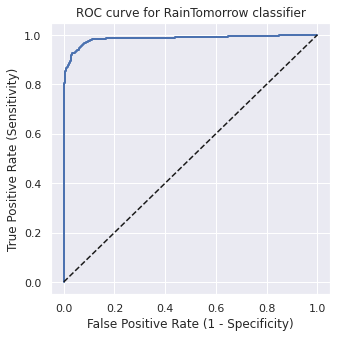

In [181]:
#ROC Curve
y_pred_proba = final_model.predict_proba(x_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [182]:
# ROC Evaluation
ROC_AUC = metrics.roc_auc_score(y_test,y_pred_proba)
print(f'Model ROC_AUC = {100*ROC_AUC:0.3} %' )

Model ROC_AUC = 98.5 %


## Conclusion


*KNN and SVM algorithms had very low performance.

*The remaining models had relativey good performance.

*The best results were obtained using Logitic Regression & Random Forest & XGBoost & Ensemble.

*Logitic Regression Score:

Model Accuracy = 95.7 %

Model recall = 90.1 %

Model precision = 93.3 %

Model f1_score = 91.7 %

*Random Forest Score:

Model Accuracy = 95.4 %

Model recall = 85.5 %

Model precision = 96.7 %

Model f1_score = 90.8 %

*XGBoost Score:

Model Accuracy = 96.1 %

Model recall = 89.0 %

Model precision = 96.0 %

Model f1_score = 92.4 %

*Ensemble Score:

Model Accuracy = 95.3 %

Model recall = 88.2 %

Model precision = 93.7 %

Model f1_score = 90.9 %

----------------------------------------------------------------------------------------------------------------------------------------------------------------